TASK-01 Prediction Using Supervised Machine Learning



Level:-Beginner

PUSHKARAJ SANJAY NAIK

In [1]:
#importing all libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
#load the dataset

url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [3]:
print(data.shape)
data

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#top 5 rows

data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
#bottom 5 rows

data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


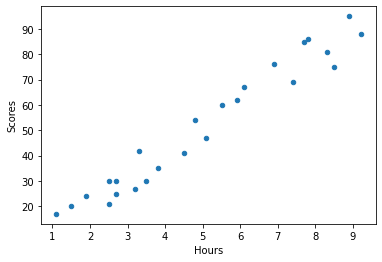

In [8]:
data.plot(kind='scatter',x='Hours',y='Scores');
plt.show()

In [9]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [10]:
data.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [11]:
hours=data['Hours']
scores=data['Scores']

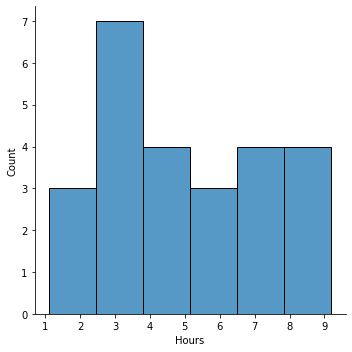

In [12]:
sns.displot(hours)

Linear Regreesion

In [13]:
X=data.iloc[:,:-1].values
y=data.iloc[:, 1].values

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [15]:
from sklearn.linear_model import LinearRegression 
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

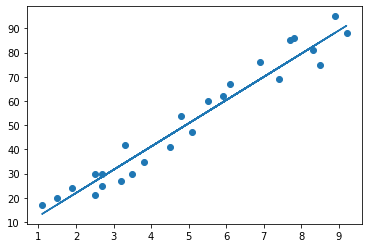

In [16]:
m=reg.coef_
c=reg.intercept_
line=m*X+c
plt.scatter(X,y)
plt.plot(X,line);
plt.show()

In [17]:
y_pred=reg.predict(X_test)

In [18]:
actual_predicted=pd.DataFrame({'Target':y_test, 'PPredicted': y_pred})
actual_predicted

,Target,PPredicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


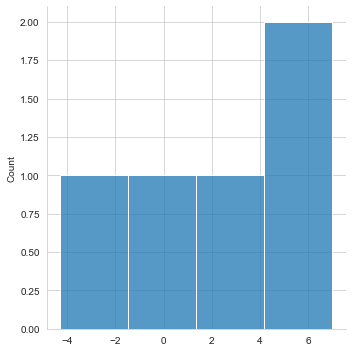

In [21]:
sns.set_style('whitegrid')
sns.displot(np.array(y_test-y_pred))
plt.show()

What would be the predicted score if a student studies for 9.25 hours/day?

In [22]:
h=9.25
s=reg.predict([[h]])
print("If a student study for {} hours per day he/she will score {} % in exam." .format(h,s))

If a student study for 9.25 hours per day he/she will score [91.56986604] % in exam.


In [24]:
#model evaluation

from sklearn import metrics 
from sklearn.metrics import r2_score 
print('Mean Abosolute Error:' , metrics.mean_absolute_error(y_test,y_pred))
print('R2 Score:' , r2_score(y_test,y_pred))

Mean Abosolute Error: 4.5916495300630285
R2 Score: 0.971014141329942
